In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Activity 1

In [2]:
df1<- read_csv("Clinical_trial.csv")

Rows: 27 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Drug
dbl (1): Pain_Rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#Activity 1: Part 1

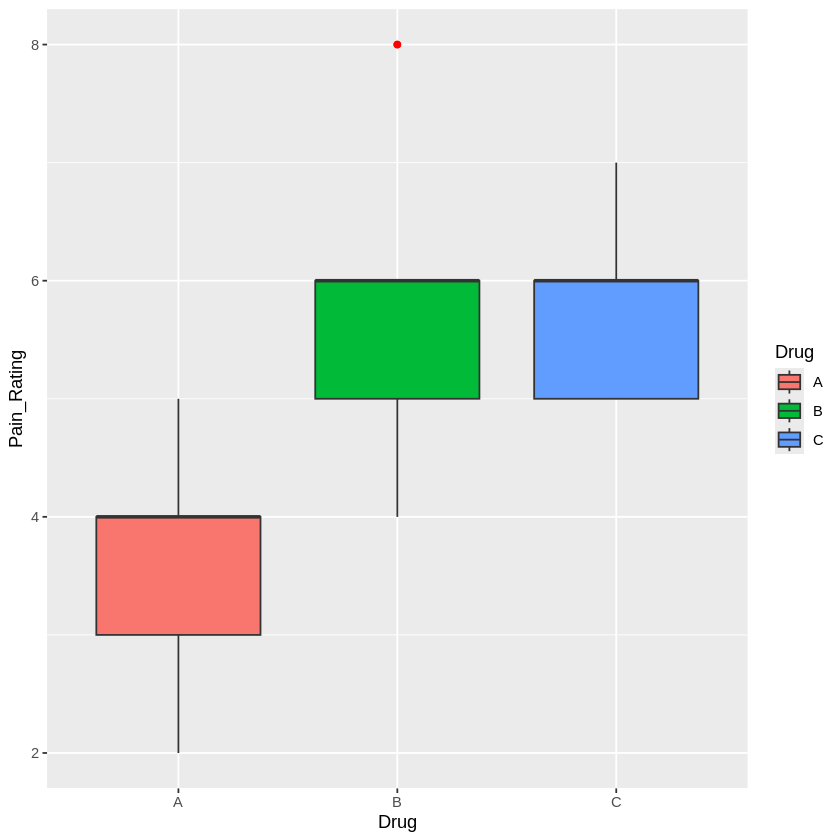

In [4]:
ggplot(df1, aes(x=Drug, y=Pain_Rating, fill=Drug))+geom_boxplot(outlier.color = "red")

Ranges for drug A is lower than that for B and C, and the IQR is the same for B and C, with the range for B being slightly more down and C's being slightly more up. Drug A produces a dramatic decrease in pain levels compared to B & C since its overall range is so far down.

#Activity 1: Part 2

H0: uA = uB = uC (drug means are equal)


H1: at least one drug mean is different




In [5]:
anova_test <- aov(Pain_Rating~Drug, data=df1)
summary(anova_test)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Drug         2  28.22  14.111   11.91 0.000256 ***
Residuals   24  28.44   1.185                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

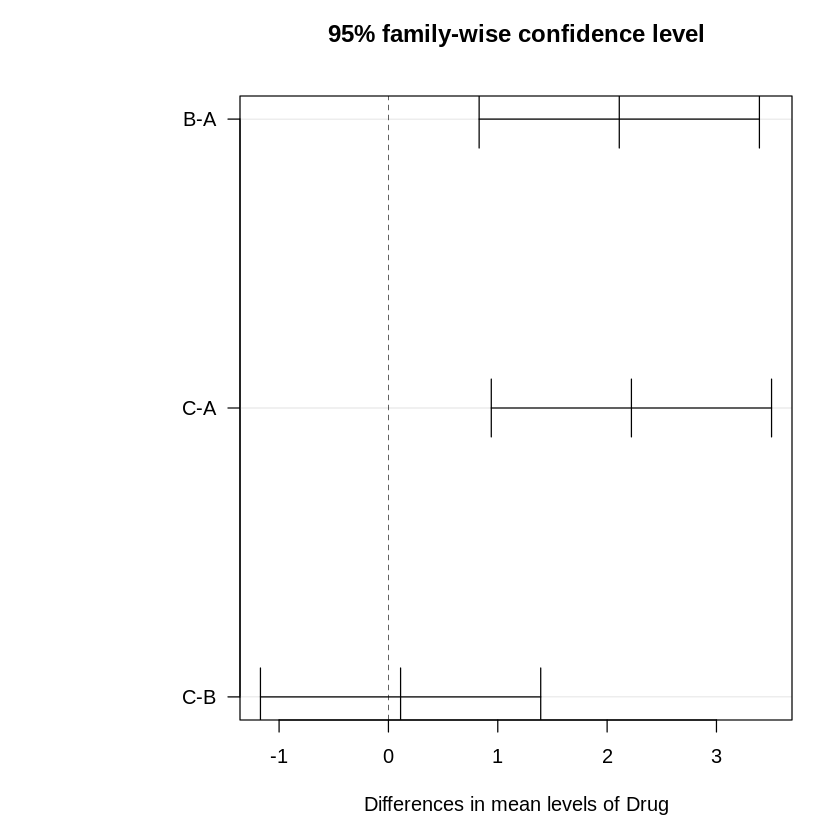

In [6]:
mult_comp = TukeyHSD(anova_test)
par(mar =c(5,10,4,2))
plot(mult_comp, las=1)

Non-technical explanation: Each drug type has a mean pain level. We want to know if at least one of drugs has a different pain level from the others. To do this, we ran a statistical test called an ANOVA test, which would tell us if at least one of the means is different. The value of interest from the test is the p-value. If that value is above 0.05, then we can assume that all the means are equal. If the value is below 0.05, then we can assume that the mean pain level is different for atleast one of the drugs. After running the test, we can wsee that the corresponding p-value is below 0,05. signifying that one of the means is in fact different. To find out which mean is different, we ran Tukey's. If you look at the graph, you can see that each pairing of drugs (B-A, C-A, C-B) has a range associated with it, and those ranges fall between values on the x axis (differences in mean levels of Drug). If the range includes the value 0, then we can assume that the means for those two groups are the same. The only pairing that includes 0 is C-B, which tells us that the means for those groups are the same. B-A and C-A don't have 0, and they include positive values only from the differences in mean levels of drugs. This means that the means for the group in the beginning of the pair (C and B in this case) have higher means than the second group in the pair (A in this case). So the final conclusions are that drug A has a different mean than both B and C, as well as that drug A's mean is lower than the means for B and C.

# Activity 1 Part 3

The goal of the prediciton model would be to predict pain levels using drug type.

If the pharmaceutical company does not have enough prior data to go off of and build a model, they might prioritize inference. The company might also prioritize inference if the stakes are not as high and there are no serious repurcussions to inferring which drug would lead to the lowest pain levels.


A pharmaceutical company might prioritize prediction if they have a large amount of past data to build a model with. They also might prioritize predicition if they don't have much knowlege about the situation at hand and want to use past precedence to figure out the best course of action.

# Activity 2

In [15]:
df2<- read_csv("WA_Marketing-Campaign.csv")

Rows: 548 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): MarketSize
dbl (6): MarketID, LocationID, AgeOfStore, Promotion, week, SalesInThousands

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
df2$week <- as.factor(df2$week)

In [17]:
df2$Promotion <- as.factor(df2$Promotion)

# Activity 2 Part 1

In [ ]:
# Activity 2 Part 1

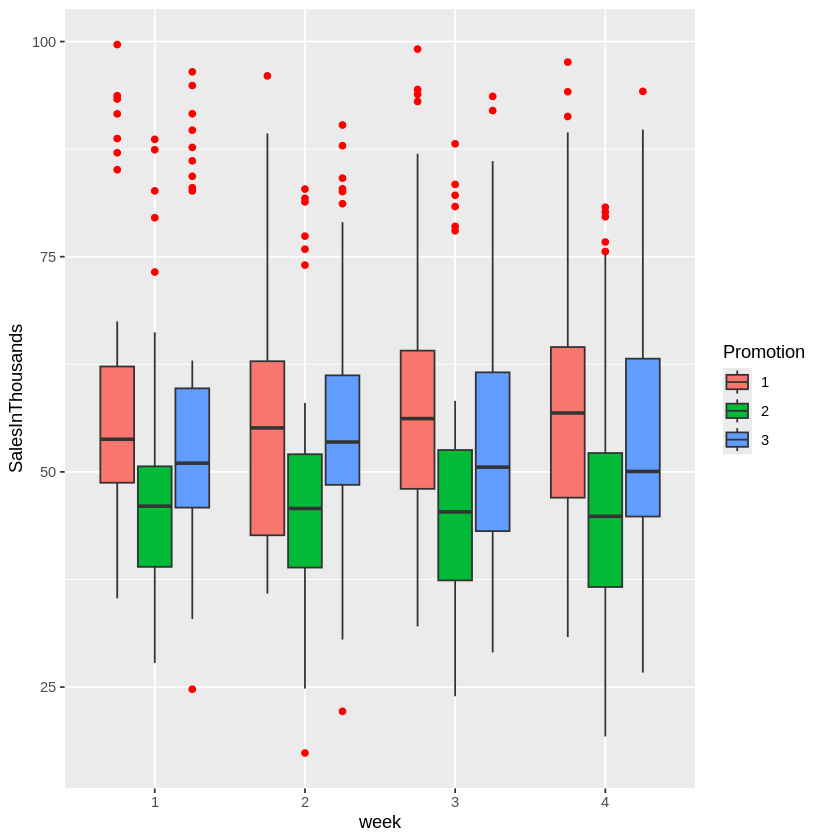

In [19]:
ggplot(df2, aes(x=week, y=SalesInThousands, fill=Promotion))+geom_boxplot(outlier.color = "red")

Overall, promotion type 1 had the chance the have the highest sales across all weeks, as the upper limit on the range and iqr was the highest. Promotion type 3 was consistently the worst overall in sales across all weeks

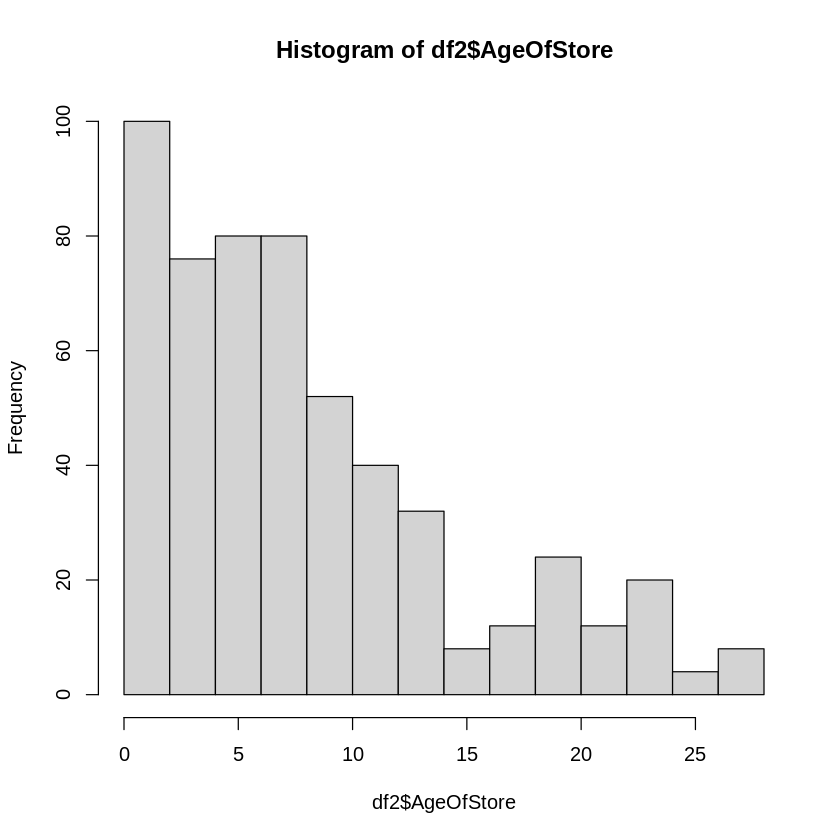

In [26]:
hist(df2$AgeOfStore)

Most stores were only around for 10 yrs or less

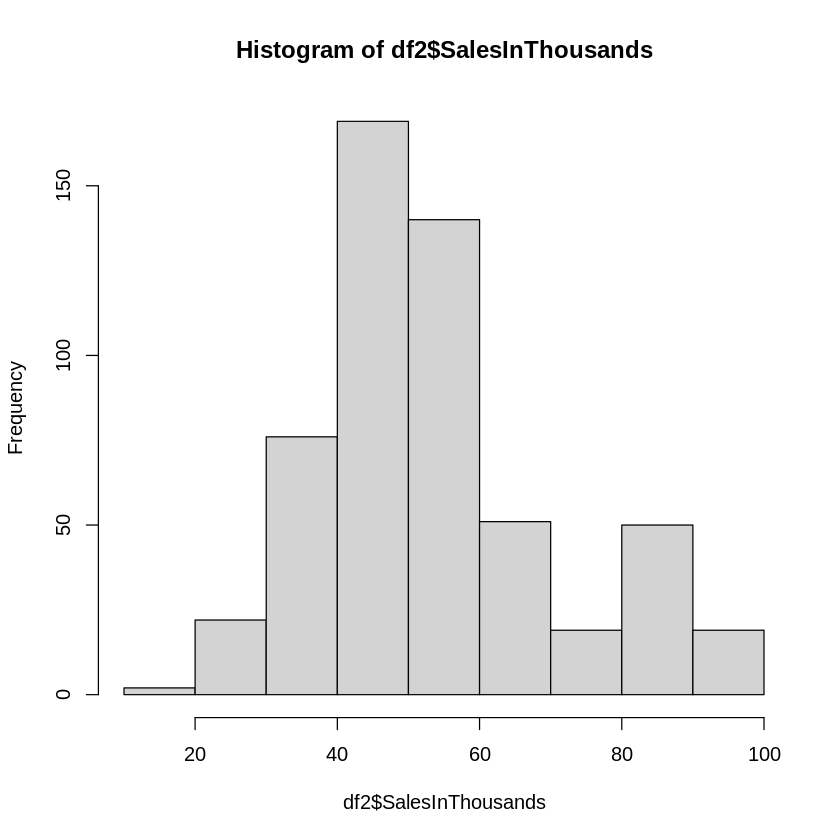

In [28]:
hist(df2$SalesInThousands)

Most people made between 40k to 50k in sales

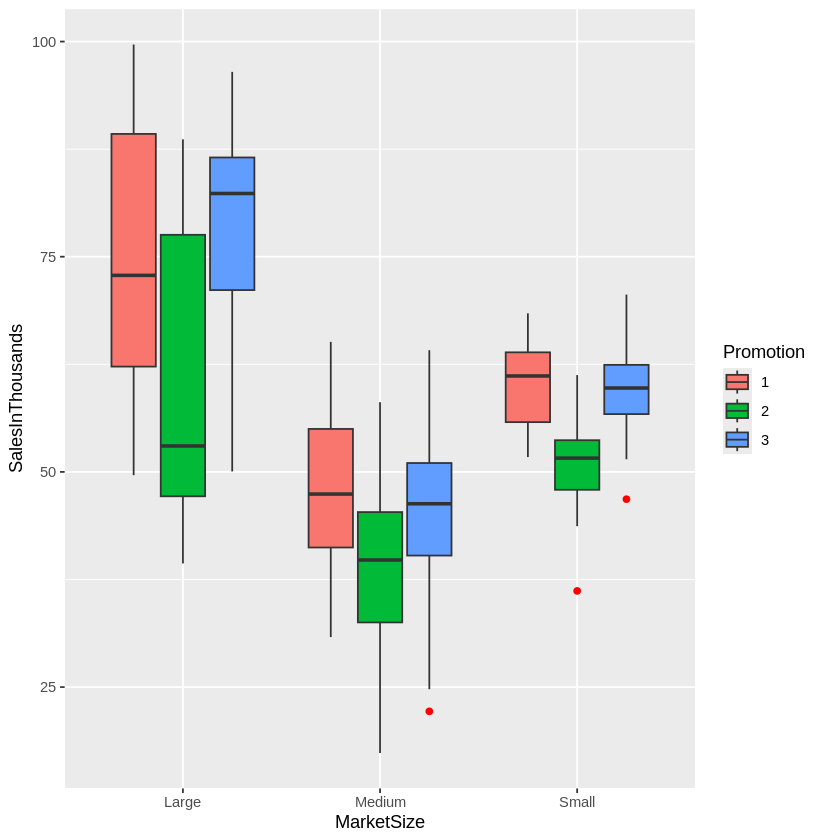

In [29]:
ggplot(df2, aes(x=MarketSize, y=SalesInThousands, fill=Promotion))+geom_boxplot(outlier.color = "red")

Overall, large markets outperform the other 2 across all promotional types.

# Activity 2 Part 2

H0: uL = uM = uS (where each mean represents mean sale amount by market size)


H1: at least one population mean is different


Relevant because they can find out if a certain market size is more profitable than the others

In [30]:
anova_test <- aov(SalesInThousands~MarketSize, data=df2)
summary(anova_test)

             Df Sum Sq Mean Sq F value Pr(>F)    
MarketSize    2  76273   38136   268.9 <2e-16 ***
Residuals   545  77290     142                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

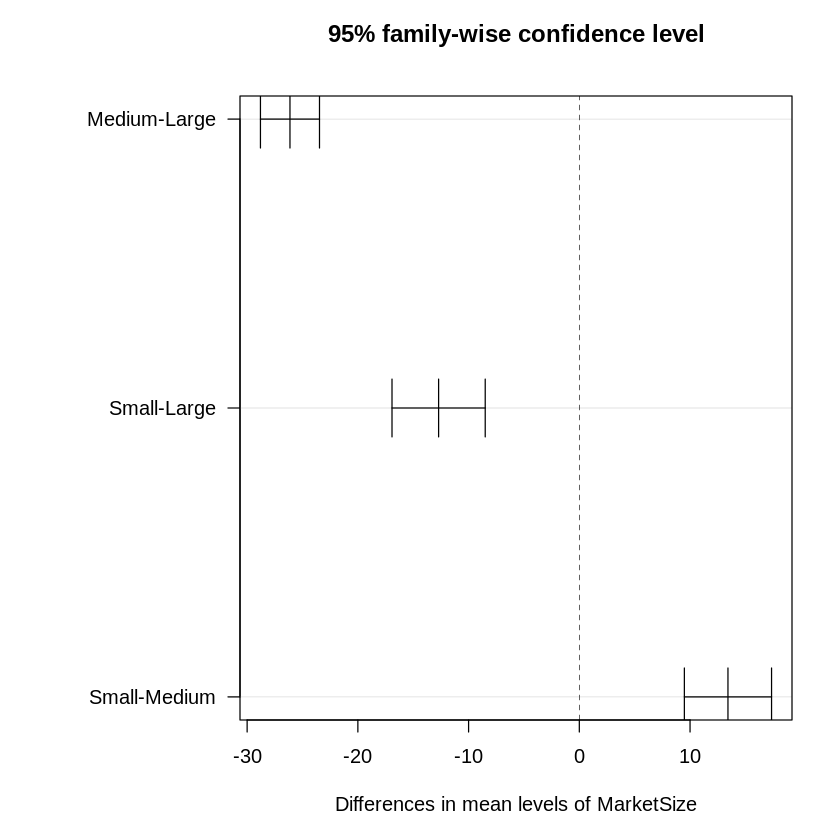

In [31]:
mult_comp = TukeyHSD(anova_test)
par(mar =c(5,10,4,2))
plot(mult_comp, las=1)

all 3 means are different for the market sizes with medium being less than small and large, small being less than large but greater than medium, and large being greater than both small and medium

Research question:

Do different promotional type lead to higher sales across different weeks?

Are different market sizes more profitable across different weeks?

Is there a promotional type that gets more sales for stores over 15 years old than younger stores?

#Activity 2 Part 3

For a fast food chain, there might not be a need for predictive modeling. In this case, the company wants to make an inference about a larger population using a smaller sample, which is why statistical inference would work better for them. Prediction models are more complicated, and they might not have enough data or features needed to build a good model.

Larger markets might get more traffic, which would cause more people to be affected by promotions and generate more sales overall.

For store age, I think it depends. Older stores might have a more dedicated consumer base that could be interested by new things the store has to offer, or if it is older, the building might also look older and people might not be as motivated to go to the store and be affected by the promotions. In newer locations, it's possible that people don't have "favorites" from the menu, and would therefore be more willing to try new menu items.